In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from shutil import copyfile
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.14.0


## Listing the available GPUs

In [4]:
# List all available physical devices
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

# Specifically check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print(f"GPU is available: {gpus}")
else:
    print("GPU is not available.")

Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Getting the training data

In [5]:
#Training data
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2024-04-13 14:36:01--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.123, 142.250.72.219, 142.250.191.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  6.00MB/s    in 23s     

2024-04-13 14:36:24 (6.30 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [15]:
#Training data
local_zip = '/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/horse-or-human.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans')
zip_ref.close()


## Getting the validation data

In [12]:
#Validation data 
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip \
    -O "/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/validation-horse-or-human.zip"



--2024-04-13 15:56:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.123, 142.250.72.219, 142.251.46.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/validation-horse-or-human.zip’

/Users/chidam_sp/Py 100%[===================>]  10.95M  12.1MB/s    in 0.9s    

2024-04-13 15:56:26 (12.1 MB/s) - ‘/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/validation-horse-or-human.zip’ saved [11480187/11480187]



In [14]:
#Validation data 
local_zip = '/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/validation-horse-or-human.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF')
zip_ref.close()


In [6]:
os.getcwd()

'/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans'

## Training/Validation directories

In [7]:

TRAINING_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/training"
VALIDATION_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/validation/"


TRAINING_HORSE_DIR = os.path.join(TRAINING_DIR, "horses/")
VALIDATION_HORSE_DIR = os.path.join(VALIDATION_DIR, "horses/")

TRAINING_HUMAN_DIR = os.path.join(TRAINING_DIR, "humans/")
VALIDATION_HUMAN_DIR = os.path.join(VALIDATION_DIR, "humans/")

print(f"There are {len(os.listdir(TRAINING_HORSE_DIR))} images of horses for training")
print(f"There are {len(os.listdir(TRAINING_HUMAN_DIR))} images of humans for training")
print(f"There are {len(os.listdir(VALIDATION_HORSE_DIR))} images of horses for validation")
print(f"There are {len(os.listdir(VALIDATION_HUMAN_DIR))} images of humans for validation")


There are 500 images of horses for training
There are 527 images of humans for training
There are 128 images of horses for validation
There are 128 images of humans for validation


In [228]:
1027/128

8.0234375

In [229]:
256/32

8.0

In [8]:
del history, model_training, train_val_generators, model_build

NameError: name 'history' is not defined

In [326]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O '/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


--2024-04-13 19:03:54--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.189.187, 142.251.32.59, 142.250.189.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.189.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/Users/chidam_sp/Py 100%[===================>]  83.84M  6.02MB/s    in 13s     

2024-04-13 19:04:07 (6.58 MB/s) - ‘/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [327]:

def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [328]:
local_weights_file = '/Users/chidam_sp/PycharmProjects/pythonProject2/Convolutional Neural Net_TF/horses_vs_humans/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv2d_404 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 149, 149, 32)         96        ['conv2d_404[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

## Using Pretrained Model

In [350]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = -45,
                                     width_shift_range = -0.2,
                                     height_shift_range = 0.3,
                                     # brightness_range = (0.2, 0.45),
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest')

    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=128, class_mode='binary', target_size=(300, 300))
    
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, 
                                                                  batch_size=32, class_mode='binary', target_size=(300, 300))
    
    return train_generator, validation_generator

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training = True
            

def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('mixed7')
    print('last layer output shape: ', last_desired_layer.output_shape)
    last_output = last_desired_layer.output
    print('last layer output: ', last_output)
    return last_output

def create_final_model(pre_trained_model, last_output):
    from tensorflow.keras import Model
    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(1, activation='sigmoid')(x)     
    model = Model(inputs=pre_trained_model.input, outputs=x)
    model.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001), 
                    loss = 'binary_crossentropy',
                metrics = ['accuracy']) 
    return model
            
            
def model_training(EPOCHS, pre_trained_model):
    import datetime
    
    start_time = datetime.datetime.now()
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

    callbacks = myCallback()
    last_output = output_of_last_layer(pre_trained_model)
    model = create_final_model(pre_trained_model, last_output)
    history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=2, callbacks=[callbacks])
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return history            


In [351]:

pre_trained_model = create_pre_trained_model(local_weights_file)
history = model_training(10, pre_trained_model)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
last layer output shape:  (None, 17, 17, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")
Epoch 1/10
9/9 - 20s - loss: 2.8373 - accuracy: 0.8530 - val_loss: 1.0815 - val_accuracy: 0.8828 - 20s/epoch - 2s/step
Epoch 2/10

Reached 93% accuracy so cancelling training!
9/9 - 18s - loss: 0.0582 - accuracy: 0.9854 - val_loss: 0.4607 - val_accuracy: 0.9258 - 18s/epoch - 2s/step
Training time:  0:00:39.509901


## Data Augmentation

In [179]:
del history, model_training, train_val_generators, model_build

NameError: name 'history' is not defined

In [186]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = (ImageDataGenerator(rescale=1./255,
                                    rotation_range = 45,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     brightness_range = (0.2, 0.45),
                                    zoom_range=[.8, 1],
                                    channel_shift_range=20,
                                     shear_range = 0.2,
                                     # zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest'))
    # (rescale=1./255, rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,
    #                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=100, class_mode='binary', target_size=(300, 300))
    
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, 
                                                                  batch_size=32, class_mode='binary', target_size=(300, 300))
    
    return train_generator, validation_generator

def model_build():
#     data_augmentation = tf.keras.Sequential([
#         layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.2),
# ])
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
        tf.keras.layers.MaxPooling2D(2, 2),       
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.000013, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

#How to set up a CV loop for a computer vision problem?

def model_training(EPOCHS, model_checkpoint_path):
    import datetime
    start_time = datetime.datetime.now()
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_loss', mode='min', save_best_only=True)
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)
    callbacks = myCallback()
    model = model_build()
    history = model.fit(train_generator, steps_per_epoch=8, epochs=EPOCHS, validation_data=validation_generator, validation_steps=8,verbose=1, callbacks=[callbacks, model_checkpoint])
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return history


In [187]:
# starting at 4.22 - it took more than an hour. Still did not get any decent result and that's primarily because the data augmentation did not produce
#useful transformations reflecting what the model would potentially see in the validation data.


In [188]:

TRAINING_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/training"
VALIDATION_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/validation/"
model_checkpoint_path = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/stacked_cov2d_model.h5'
history = model_training(10, model_checkpoint_path)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 0.6910 - accuracy: 0.5350 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6922 - accuracy: 0.5062 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6921 - accuracy: 0.5268 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.6919 - accuracy: 0.5296 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.6917 - accuracy: 0.5337 - val_loss: 0.6972 - val_accuracy: 0.5039
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.6916 - accuracy: 

In [189]:

def plot_learning_curve_metric(history, lower_limit, upper_limit):
    plt.plot(history['accuracy'], label='training_accuracy')
    plt.plot(history['val_accuracy'], label='validation_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='lower right')

def plot_learning_curve_loss(history, lower_limit, upper_limit):
    plt.plot(history['loss'], label='training_loss')
    plt.plot(history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')
    plt.show()



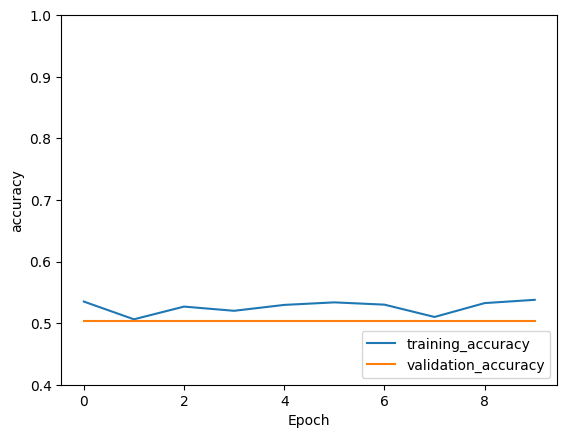

In [190]:
# With Adam optimizer
plot_learning_curve_metric(history.history, 0.4, 1)


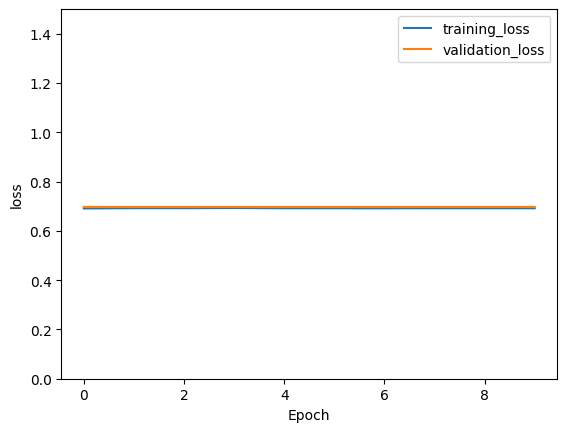

In [191]:
# With Adam optimizer

plot_learning_curve_loss(history.history, 0, 1.5)

In [1]:
from tensorflow.keras.backend import clear_session
clear_session()

In [2]:
del history, model
import gc
gc.collect()

NameError: name 'history' is not defined